# Libraries

In [24]:
import kaggle
import pandas as pd
import numpy as np
import sidetable as stb
import missingno
import matplotlib.pyplot as plt
import seaborn as sns



## Libraries Settings


In [2]:
sns.set_theme(
    context='notebook',
    style='ticks',
    font_scale=.8,
    palette='colorblind',
    rc={
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.labelpad': 20,
        'axes.titlepad': 30,
    }
)

# 1. Load Data

In [3]:
# Use kaggle.api to download and unzip dataset
dataset = 'sridharstreaks/insurance-data-for-machine-learning'
kaggle.api.dataset_download_files(dataset, path='../data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning


In [4]:
# Load insurance_dataset.csv in a raw pandas DataFrame
df_raw = pd.read_csv('../data/insurance_dataset.csv')
df_raw.head(5)  # Show first 5 rows from DataFrame

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


# 2. Data Understanding

## 2.1. Data summary

In [5]:
# Show dataset informations
df_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 512.0 MB


In [6]:
# Change object dtypes to categorical
cat_cols = df_raw.select_dtypes('object').columns.to_list()
df_raw[cat_cols] = df_raw[cat_cols].astype('category')

In [7]:
# Show dataset after change object to category, including memory_usage
df_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   age                     1000000 non-null  int64   
 1   gender                  1000000 non-null  category
 2   bmi                     1000000 non-null  float64 
 3   children                1000000 non-null  int64   
 4   smoker                  1000000 non-null  category
 5   region                  1000000 non-null  category
 6   medical_history         749238 non-null   category
 7   family_medical_history  749596 non-null   category
 8   exercise_frequency      1000000 non-null  category
 9   occupation              1000000 non-null  category
 10  coverage_level          1000000 non-null  category
 11  charges                 1000000 non-null  float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 38.1 MB


In [8]:
# Show a dataset summary
df_raw.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


## 2.2. Duplicated and Missing Values

In [9]:
# Verify if duplicated values exist
df_raw.duplicated().any()

np.False_

In [10]:
# Check missing values
df_raw.stb.missing()

,missing,total,percent
medical_history,250762,1000000,25.0762
family_medical_history,250404,1000000,25.0404
age,0,1000000,0.0000
gender,0,1000000,0.0000
children,0,1000000,0.0000
bmi,0,1000000,0.0000
region,0,1000000,0.0000
smoker,0,1000000,0.0000
exercise_frequency,0,1000000,0.0000
occupation,0,1000000,0.0000


<Axes: >

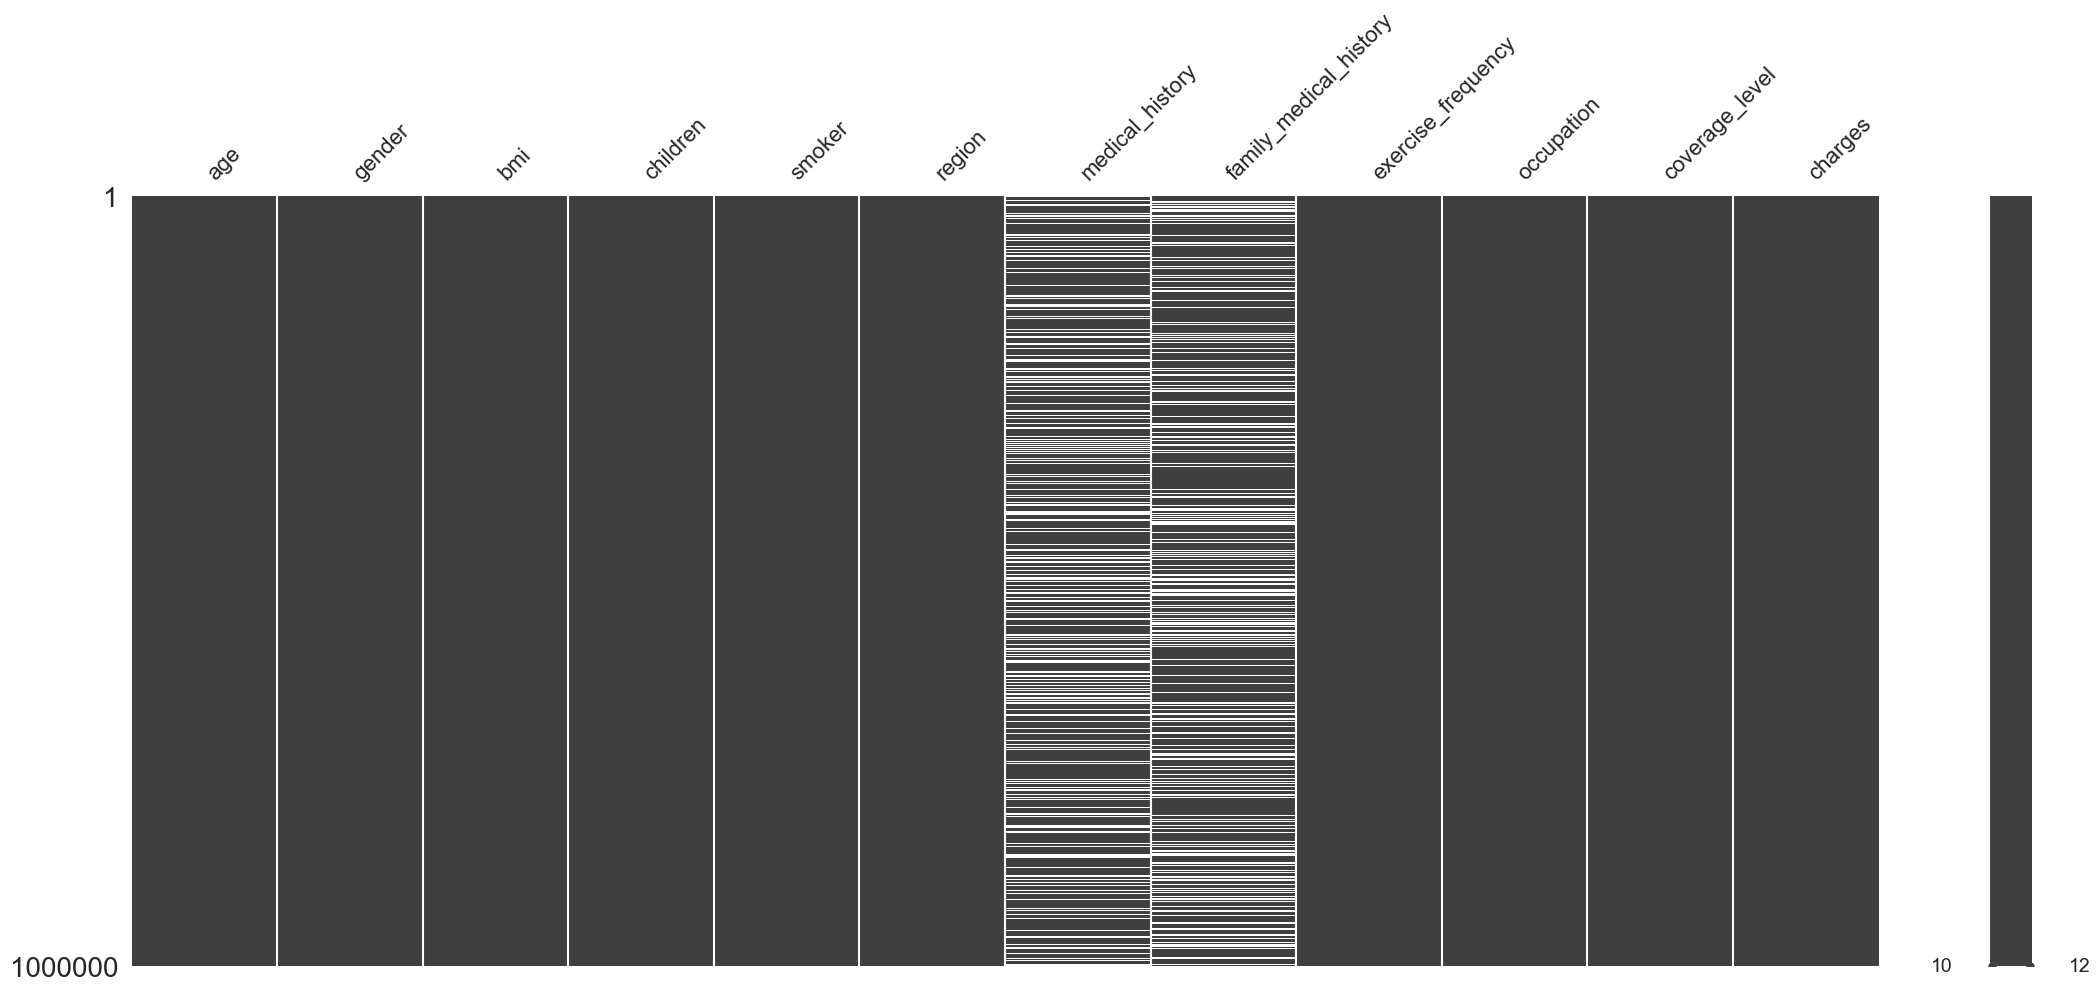

In [11]:
# Graphically check missing values
missingno.matrix(df_raw)

## 2.3. Target distribution

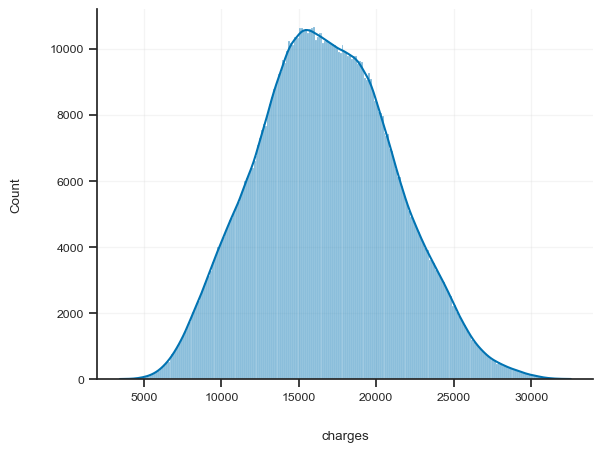

In [44]:
# Show a general charges distribution
sns.histplot(data=df_raw, x='charges', kde=True)
sns.despine();

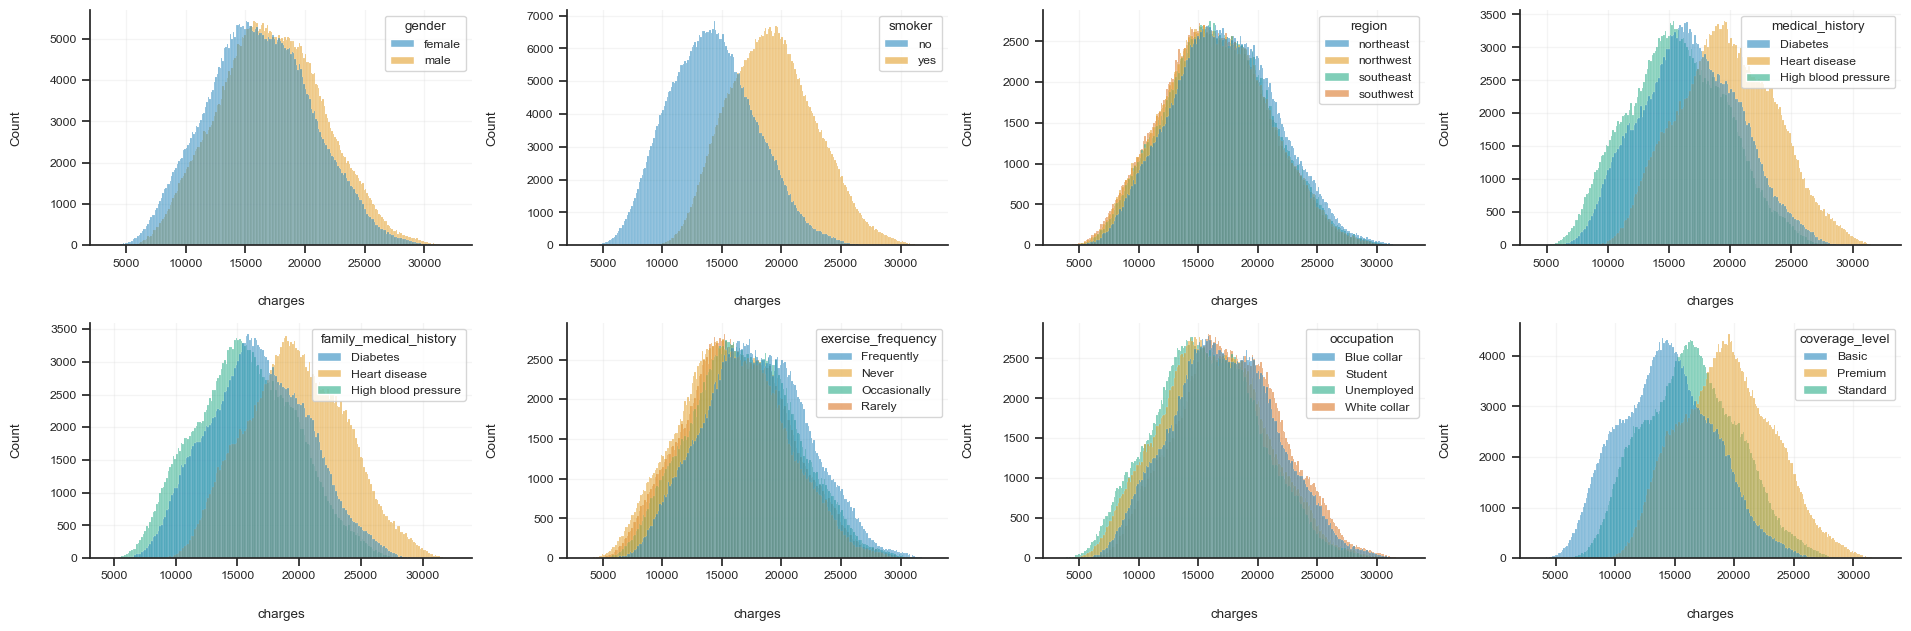

In [56]:
# Show charges distribution by categorical features
ncols = 4
nrows = int(np.ceil((len(cat_cols)) / ncols))
fig, axes = plt.subplots(figsize=(4.8*ncols, 6.4), nrows=nrows,
                         ncols=ncols)
axes = axes.flatten()
for cat, ax in zip(cat_cols, axes):
    sns.histplot(data=df_raw, x='charges', hue=cat, ax=ax)
    sns.despine()
plt.tight_layout()
plt.show()